<a href="https://colab.research.google.com/github/paucaroscanoa/Series-de-Tiemop---UNI/blob/master/Pr%C3%A1ctica_2_STF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


                    Open          High           Low         Close      Volume
Date                                                                          
2023-01-03  10562.059570  10613.059570  10309.160156  10386.980469  4780650000
2023-01-04  10467.820312  10515.219727  10337.639648  10458.759766  5085380000
2023-01-05  10390.309570  10393.219727  10295.250000  10305.240234  4764270000
2023-01-06  10363.959961  10604.139648  10265.040039  10569.290039  5199780000
2023-01-09  10662.099609  10807.259766  10619.120117  10635.650391  5132190000
            market_value
Date                    
2023-01-03  10386.980469
2023-01-04  10458.759766
2023-01-05  10305.240234
2023-01-06  10569.290039
2023-01-09  10635.650391
Analisis Descriptivo
       market_value
count    332.000000
mean   13660.026820
std     1569.566130
min    10305.240234
25%    12209.654785
50%    13660.199707
75%    14869.484863
max    16442.199219
Identificar Valores Nulos
market_value    0
dtype: int64
Graficamos la 

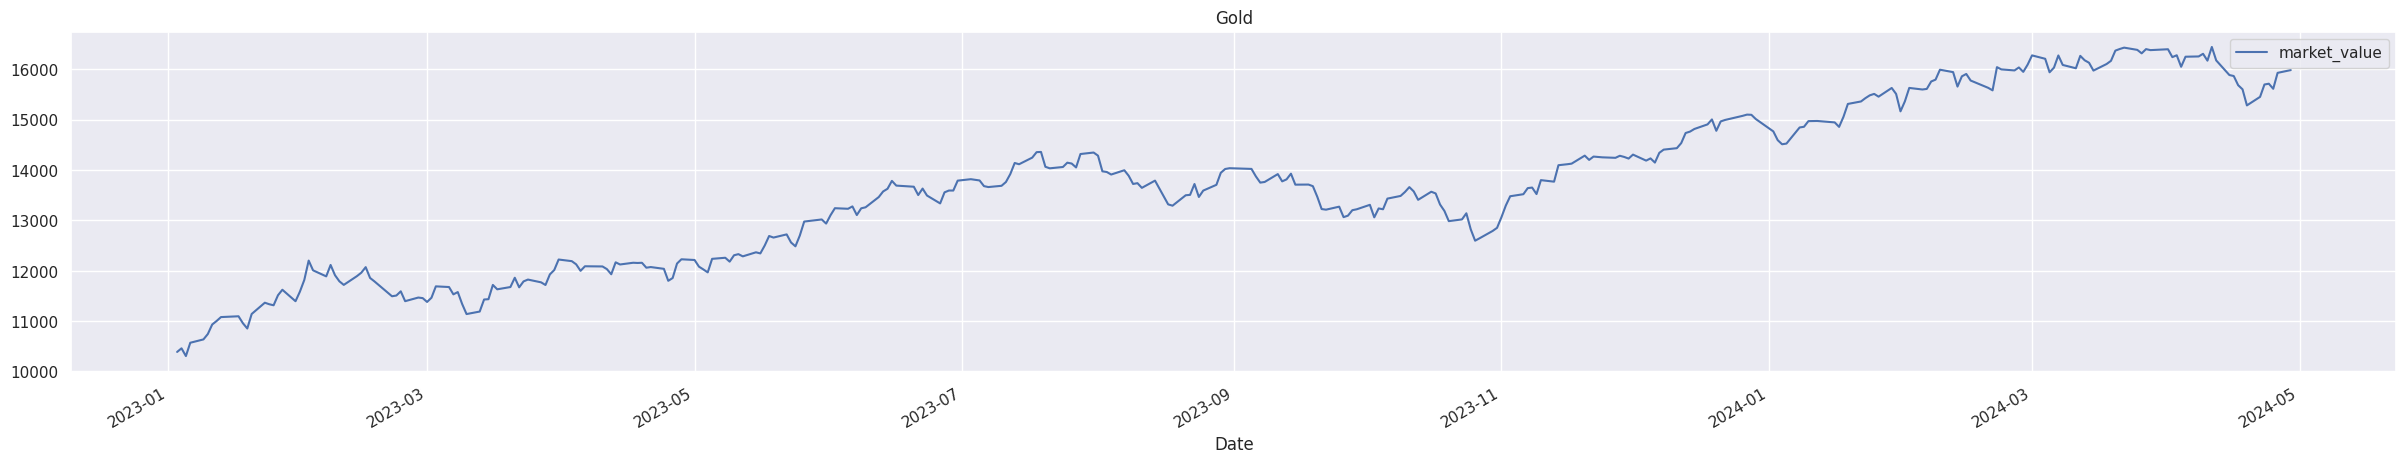

Datos para Modelo y Prueba


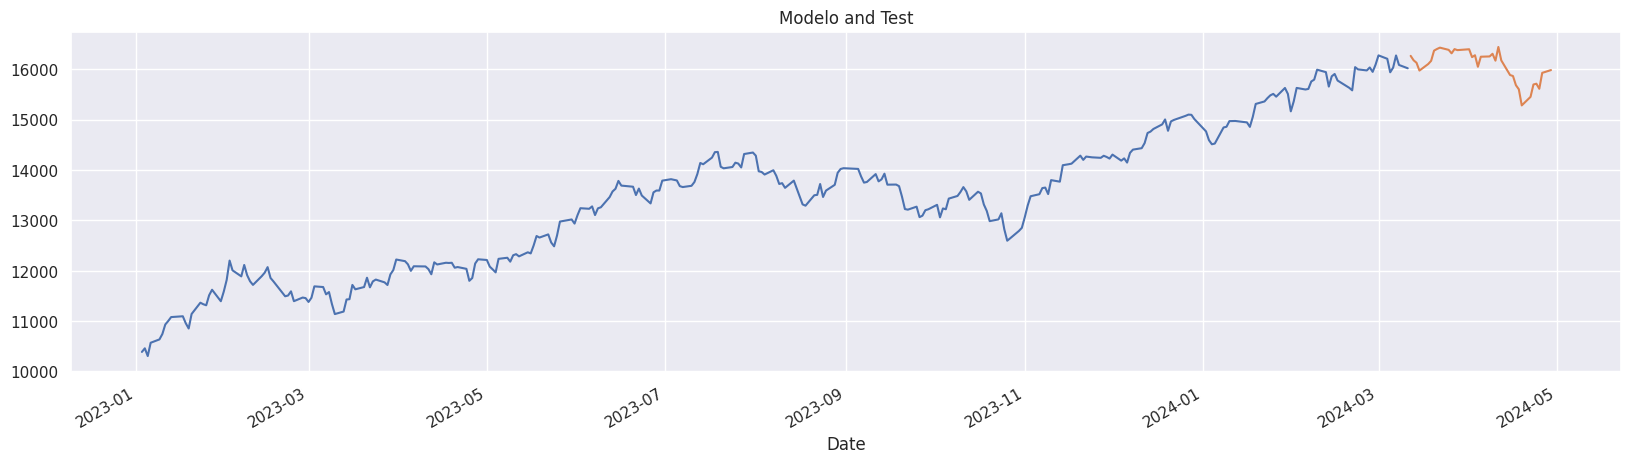

Análisis Descriptivo


<Figure size 6000x500 with 0 Axes>

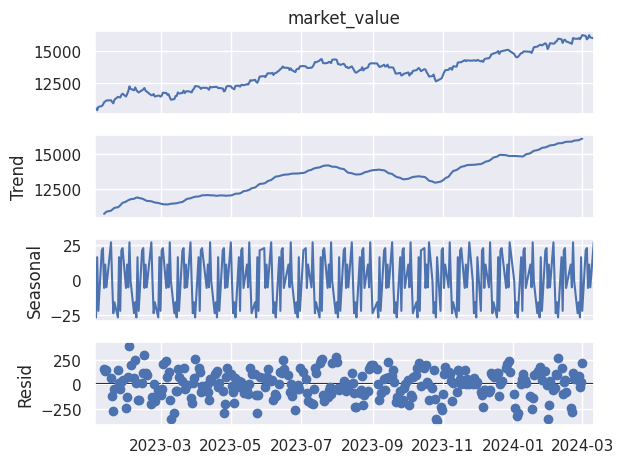

Primera diferencia, prueba de estacionariedad
Date
2023-01-03           NaN
2023-01-04     71.779297
2023-01-05   -153.519531
2023-01-06    264.049805
2023-01-09     66.360352
                 ...    
2024-03-05   -267.919922
2024-03-06     91.950195
2024-03-07    241.839844
2024-03-08   -188.269531
2024-03-11    -65.840820
Name: primera_diferencia, Length: 298, dtype: float64
DF Test - Esacionariedad
ADF Statistic: -13.286542219514606
p-value: 7.508443004057831e-25
-----------------------------------------------------------------------
ACF y PACF de la serie diferenciada sin tendencia


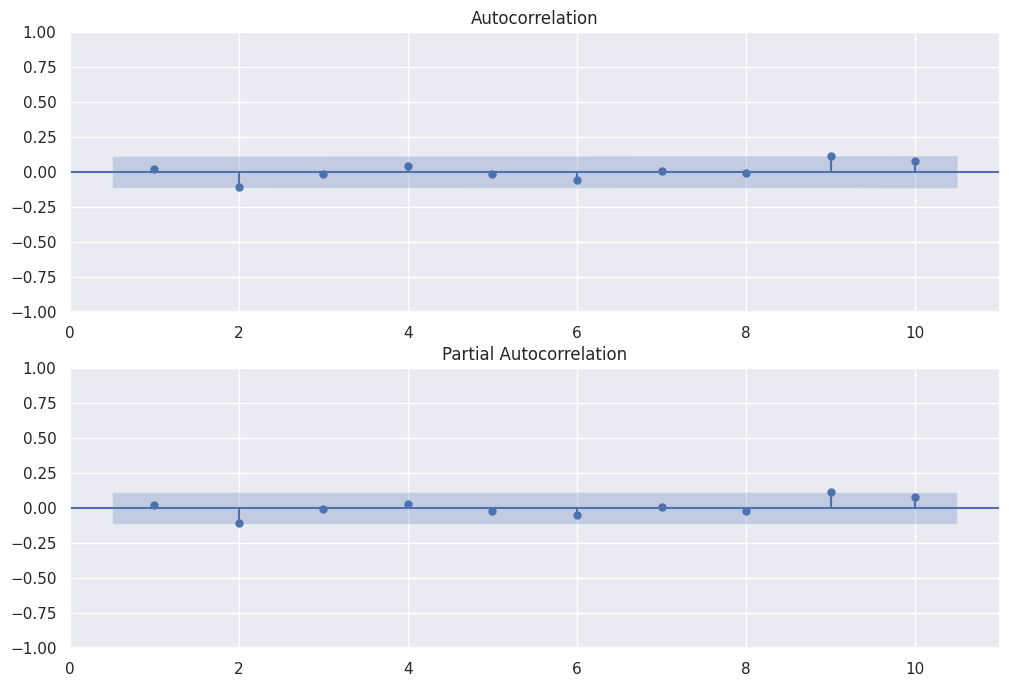

-----------------------------------------------------------------------
Diferenciación para eliminar la estacionalidad.
            market_value
Date                    
2023-01-20    753.449219
2023-01-23    905.650391
2023-01-24   1029.029297
2023-01-25    744.070312
2023-01-26    876.759766
...                  ...
2024-03-05     33.419922
2024-03-06    255.889648
2024-03-07    642.599609
2024-03-08    504.240234
2024-03-11    -22.350586

[286 rows x 1 columns]


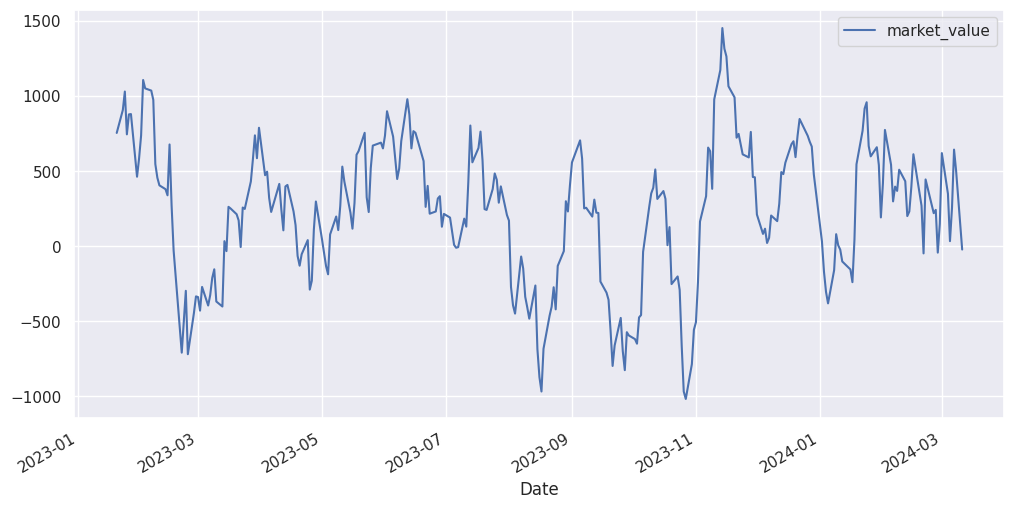

-----------------------------------------------------------------------
ACF y PACF de la serie diferenciada estacionalmente


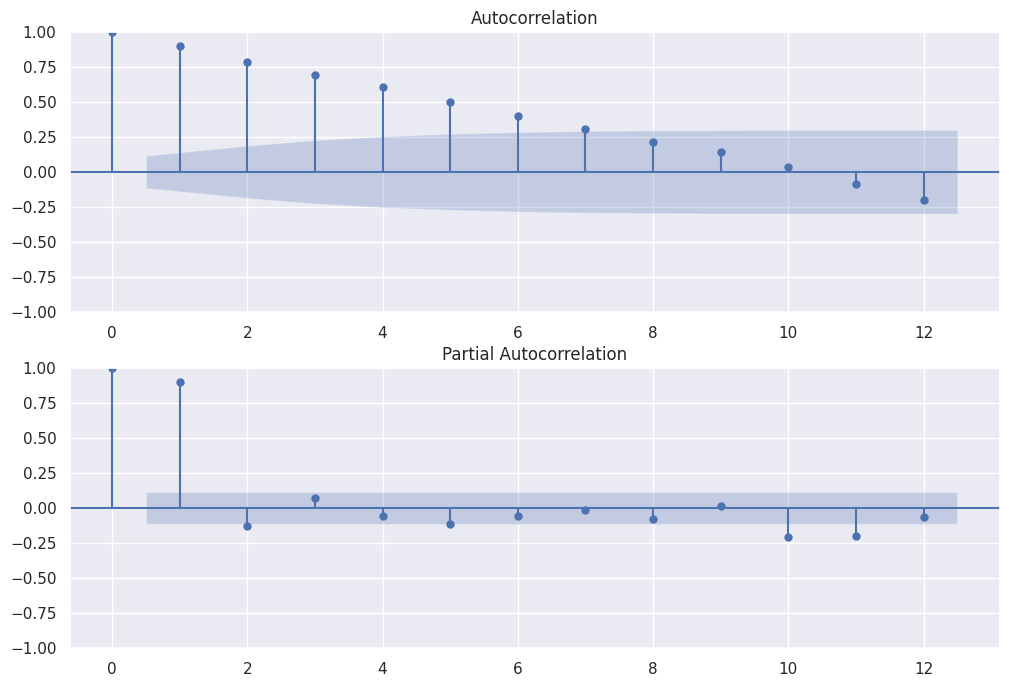

Ajuste del Modelo  - SARIMA
                                      SARIMAX Results                                      
Dep. Variable:                        market_value   No. Observations:                  298
Model:             SARIMAX(0, 2, 1)x(1, 1, [], 10)   Log Likelihood               -1869.255
Date:                             Sat, 12 Oct 2024   AIC                           3744.510
Time:                                     16:21:58   BIC                           3755.478
Sample:                                          0   HQIC                          3748.906
                                             - 298                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9995      0.250     -3.992      0.000      -1.490      -0.509

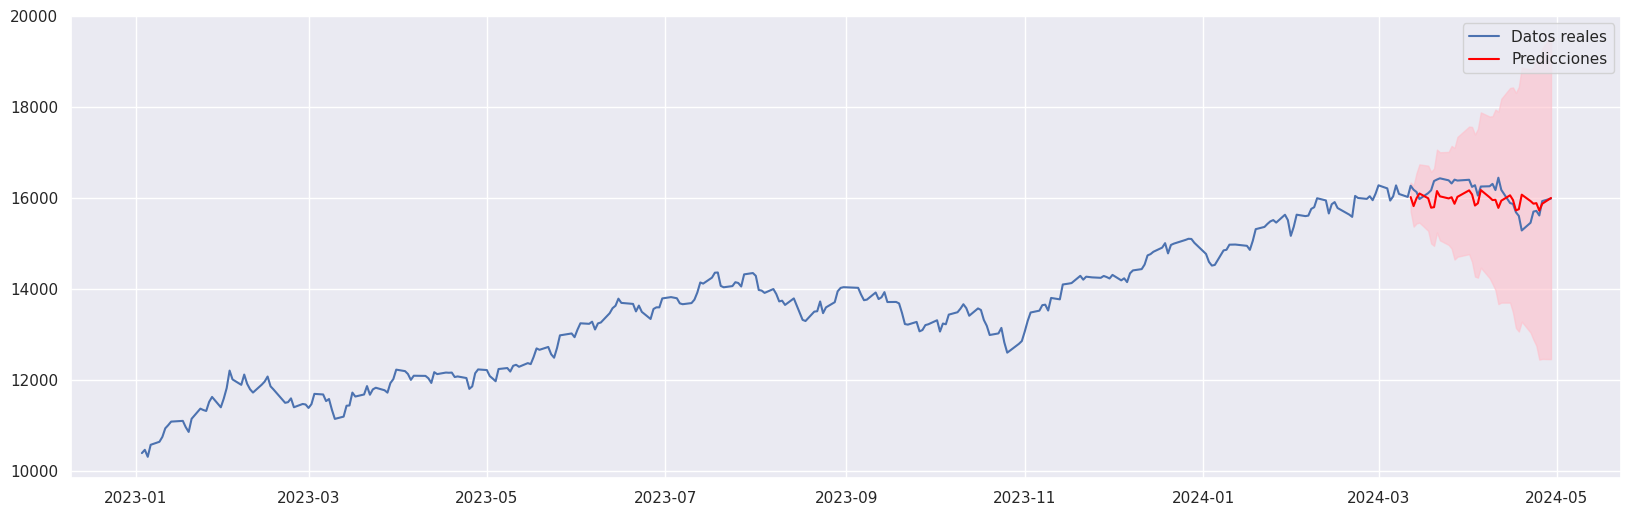

-----------------------------------------------------------------------
Evaluando el modelo - Datos Test vs Datos pronosticados
Mean Squared Error: 106561.24417188298


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings

sns.set()

#!pip install yfinance
import yfinance as yf
#Descargar un grupo de series o una serie de yahoo finance
raw_data = yf.download (tickers = "^IXIC", start = "2023-01-01",
                        end = "2024-04-30", interval = "1d", group_by = 'ticker', auto_adjust = True)
#Crear una copia de los datos para no alterar la base inicial.
df_comp = raw_data.copy()
#Creamos una copia para evaluar la estacionariedad haciendo la primera diferencia - elimina tendencia
#df_estacionariedad = raw_data.copy()
print(df_comp.head())
#Crear nuevas columnas con las variables de interes
#PRE PROCESADO: eliminar las variables que sobran, arreglar la frecuencia a business days y rellenar datos faltantes.
df_comp['market_value']= df_comp.Close[:]
del df_comp['Open']
del df_comp['High']
del df_comp['Low']
del df_comp['Close']
del df_comp['Volume']
#df_comp=df_comp.asfreq('b') #frecuenca business day
df_comp=df_comp.fillna(method='ffill') #completar valores nulos
print(df_comp.head())
#Realizamos un analisis descriptivo previo, cantidad de datos, identificación valores nulos y graficamos la serie.
print('Analisis Descriptivo')
print(df_comp.describe())
print('Identificar Valores Nulos')
print(df_comp.isna().sum())
print('Graficamos la serie')
import matplotlib.pyplot as plt
df_comp.plot(figsize=(30,5), title = "Gold")
plt.show()
# Realizamos la división de los datos en modelo y prueba.
print('Datos para Modelo y Prueba')
size = int(len(df_comp)*0.9)
df_modelo= df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df_modelo.market_value.plot(figsize=(20,5), title = "Gold")
df_test.market_value.plot(figsize=(20,5), title = "Gold")
plt.title("Modelo and Test")
plt.show()
#Realizamos un análisis descriptivo de los datos para el modelo, descomponemos para evidenciar tendencia, ciclo, estacionalidad.
print('Análisis Descriptivo')
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_additive=seasonal_decompose(df_modelo.market_value,model='additive', period=12)
plt.figure(figsize=(60, 5))
s_dec_additive.plot()
plt.show()
# Dado la tendencia diferenciamos para poder validar estacionariedad
df_estacionariedad = df_modelo.copy()
print('Primera diferencia, prueba de estacionariedad')
df_estacionariedad['primera_diferencia'] = df_estacionariedad.market_value.diff()
warnings.filterwarnings('ignore')
print(df_estacionariedad['primera_diferencia'])
#Aplicando Dickey-Fuller para validar supuesto de estacionariedad
#H0: La serie no es estacionaria
#H1: la serie es estacionaria
print("DF Test - Esacionariedad")
ad_fuller_result = adfuller(df_estacionariedad.primera_diferencia[1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

# ACF y PACF de la serie diferenciada por tendencia
print('-----------------------------------------------------------------------')
print('ACF y PACF de la serie diferenciada sin tendencia')
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sgt.plot_acf(df_estacionariedad.primera_diferencia[1:],alpha = 0.05, zero =False, lags = 10, ax=ax[0])
sgt.plot_pacf(df_estacionariedad.primera_diferencia[1:], lags = 10, alpha = 0.05, method = ('ywm'), zero=False, ax=ax[1])
plt.show()

#Para determinar los parametros del componente estacional, diferenciamos con el objetivo de eliminar la estacionalidad
print('-----------------------------------------------------------------------')
print('Diferenciación para eliminar la estacionalidad.')
seasonal_period = 12  # Periodicidad de 12 para datos mensuales con estacionalidad anual
data_seasonal_diff = df_modelo.diff(seasonal_period).dropna()
print(data_seasonal_diff)
# Visualizar la serie diferenciada estacionalmente
data_seasonal_diff.plot(figsize=(12, 6))
plt.show()
# ACF y PACF de la serie diferenciada estacionalmente
print('-----------------------------------------------------------------------')
print('ACF y PACF de la serie diferenciada estacionalmente')
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_seasonal_diff, lags=12, ax=ax[0])
plot_pacf(data_seasonal_diff, lags=12, ax=ax[1])
plt.show()

#Ajustes del modelo
#print('Ajuste del Modelo AR, MA, ARMA')
#model= ARIMA(df_modelo.market_value, order=(1,2,0))
#results = model.fit()
#print(results.summary())

print('Ajuste del Modelo  - SARIMA')
# SARIMA parameters
# (p, d, q) x (P, D, Q, s) - SARIMA parameters
# (p, d, q) : se determina con la ACF y PACF serie sin tendencia
# (P, D, Q, s) : se termina con la ACF y PACF serie sin estacionalidad
# Ajustar el modelo SARIMA
model = SARIMAX(df_modelo.market_value, order=(0, 2, 1), seasonal_order=(1, 1, 0, 10))
results = model.fit(disp=True)
print(results.summary())

#!pip install pmdarima
#from pmdarima import auto_arima # Import the auto_arima function from pmdarima
#AUTO-SARIMA parameters
#sarima_model = auto_arima(df_modelo.market_value) # Use the imported auto_arima function
#sarima_result = sarima_model.fit(df_modelo.market_value) # Fix variable name
#print(sarima_result.summary())

# Realizar predicciones
forecast = results.get_forecast(steps=len(df_test))
forecast_index = df_test.index
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Graficar predicciones
print('-----------------------------------------------------------------------')
plt.figure(figsize=(20, 6))
plt.plot(df_comp.market_value, label='Datos reales')
plt.plot(forecast_index, forecast_values, color='red', label='Predicciones')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.60)
plt.legend()
plt.show()

#Evaluar el modelo
print('-----------------------------------------------------------------------')
print('Evaluando el modelo - Datos Test vs Datos pronosticados')
mse = mean_squared_error(df_test, forecast_values)
print(f'Mean Squared Error: {mse}')
